In [1]:
experimento = 'Experimento para buscar numero optimo de neuronas en la capa oculta 15000 samples'

In [3]:
#Importamos las librerias necesarias
import torch
import numpy as np
import pandas as pd
import Modulo_MLP
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
def evaluate_aux(model, test_loader):
        """
        Evalua el modelo previamente entrnado
        Argumentos de entrada: modelo, conjunto de test
        """
        model.eval()
        model.to(device)
        acc = []
        with torch.no_grad():
            for batch in test_loader:
                X, y = batch
                y_hat = model(X.float())
                acc.append((y == torch.argmax(y_hat, axis=1)).sum().item() / len(y))

        return np.mean(acc)


In [5]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
#Cargamos el data set
data = pd.read_csv('C:/Users/jaime/OneDrive - Universidad de Málaga/Escritorio/Jaime/TFG/HuGaDB-master/HuGaDB_v2_Digest/DataFrameFinal.csv')

#Elimino las filas con algún valor de columna vacio 
data = data.dropna()

In [2]:
print(f'\033[5;35m EXPERIMENTO --> {experimento} \033[0;m')

 EXPERIMENTO --> Experimento para buscar numero optimo de neuronas en la capa oculta 15000 samples 


In [8]:
#hyper parameters
#Numero de muestras del todo el dataset, numero de entradas de la red, numero de clases a clasificar, 
# numero de neuronas en la capa oculta, numero de epocas, numero de lotes, tasa de aprendizaje, k del K-Fold

nSamples = 15000

input_size = 38
num_classes = 12

# hidden_size = 100
num_epochs = 500
batch_size = 256
learning_rate = 0.001

num_splits = 10

nTest = 0.2

class_names = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
                'Up by elevator',  'Down by elevator'] 

In [9]:
# Obtengo un subconjunto del data set original 
# TODO Conocer la distribución de cada clase 
df = data
df = df[0:nSamples]

In [10]:
# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 10) | (df.act == 11)]
# # Elimino las muesta correpondientes a las actividades subir y bajar ascensor(10, 11)

# df = df[(df.act == 1) | (df.act == 2) | (df.act == 3) | (df.act == 4) | (df.act == 5) | (df.act == 6) | (df.act == 7) 
#         | (df.act == 8) | (df.act == 9) | (df.act == 12)]

# df = df[(df.act == 8) | (df.act == 10) | (df.act == 11)]

In [11]:
#Divido el conjunto de muestras en variable clasificatoria(y) y las demas(X)

X = df.drop(['act'], axis = 'columns')
# X.head()

y = df.act
# y.head()

num of samples: 15000
[4137, 888, 1764, 1550, 1089, 239, 271, 3003, 0, 1136, 923, 0]


<BarContainer object of 12 artists>

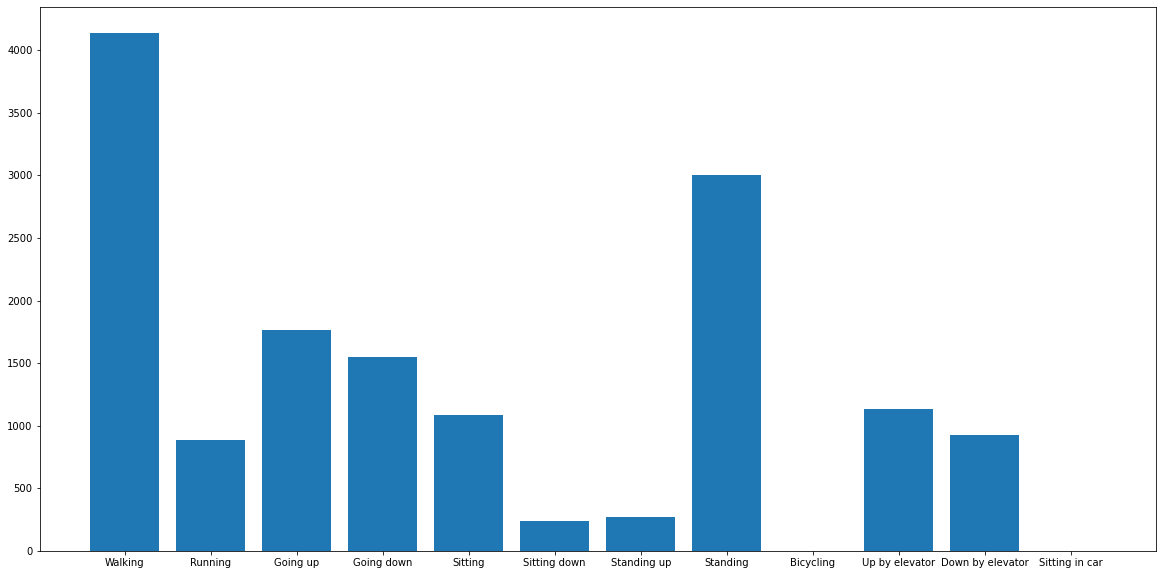

In [12]:
x_values = ['Walking', 'Running', 'Going up', 'Going down', 'Sitting', 'Sitting down', 'Standing up', 'Standing', 
               'Bicycling', 'Up by elevator',  'Down by elevator',  'Sitting in car']

y_values = []
y_values.append((df[(df.act == 1)]).shape[0])
y_values.append((df[(df.act == 2)]).shape[0])
y_values.append((df[(df.act == 3)]).shape[0])
y_values.append((df[(df.act == 4)]).shape[0])
y_values.append((df[(df.act == 5)]).shape[0])
y_values.append((df[(df.act == 6)]).shape[0])
y_values.append((df[(df.act == 7)]).shape[0])
y_values.append((df[(df.act == 8)]).shape[0])
y_values.append((df[(df.act == 9)]).shape[0])
y_values.append((df[(df.act == 10)]).shape[0])
y_values.append((df[(df.act == 11)]).shape[0])
y_values.append((df[(df.act == 12)]).shape[0])
print(f'num of samples: {sum(y_values)}')
print(y_values)
plt.figure(figsize=(20,10))
plt.bar(x_values, y_values, width=0.8)            

In [13]:
# # Porcentaje de cada clase en un conjunto de datos
# s = sum(y_values)
# w = 0
# for x in y_values:
#     y = x * 100
#     z = y / s
#     w = w + z
#     print(f'La muestra es {x} y su porcentaje es {z}')
# print(f'Total: {w}')

In [14]:
#Obtengo los valores de los conjuntos anteriores
X_val = X.values
y_val = y.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_val,y_val,test_size=nTest, random_state=0)

In [16]:
# modelo_pre_train = torch.jit.load('modelo_final_2021-06-05_0.8053_Test.zip')
# evaluate_aux(modelo_pre_train, test_loader)
modelo_pre_train = None

============ Launch with 15000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 100 Hidden neurons ============


loss 0.70804 acc 0.57666: 100%|██████████| 500/500 [03:44<00:00,  2.29it/s]

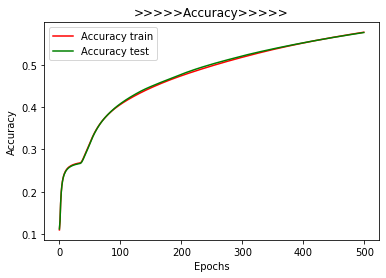

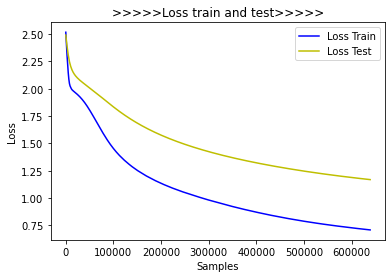

Accuracy de validación con kFold 0.6878551136363636
Accuracy Train: 0.6904166666666667 
Accuracy Test: 0.681 
Diferencia entre train y test: 0.009416666666666629

 


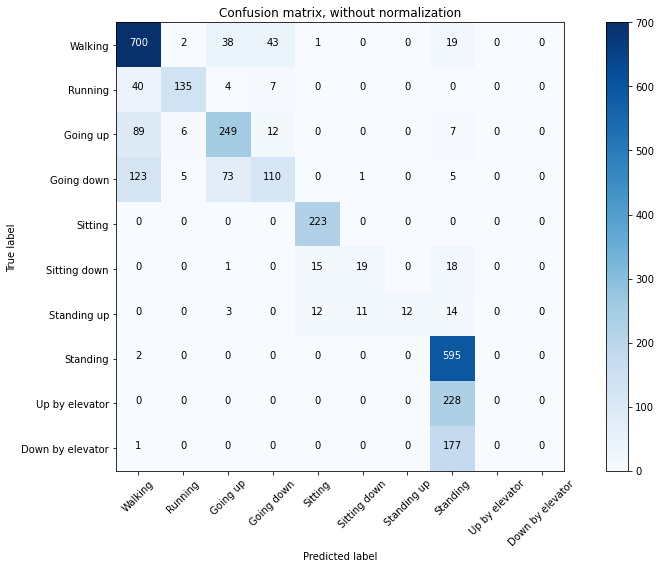

loss 0.70973 acc 0.58333: 100%|██████████| 500/500 [03:40<00:00,  2.29it/s]

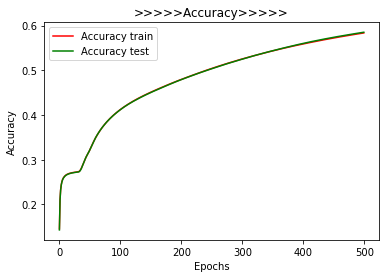

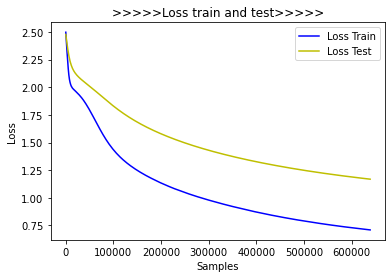

Accuracy de validación con kFold 0.6899857954545454
Accuracy Train: 0.6905833333333333 
Accuracy Test: 0.6873333333333334 
Diferencia entre train y test: 0.003249999999999975

 


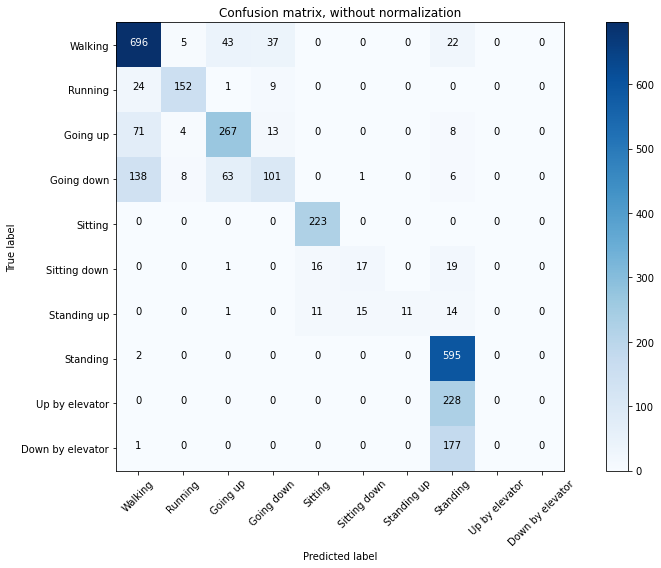

loss 0.71199 acc 0.58327: 100%|██████████| 500/500 [03:41<00:00,  2.27it/s]

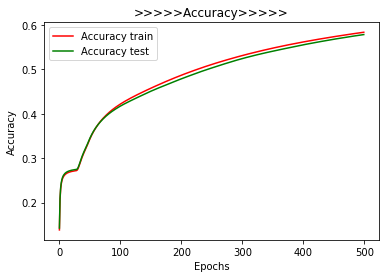

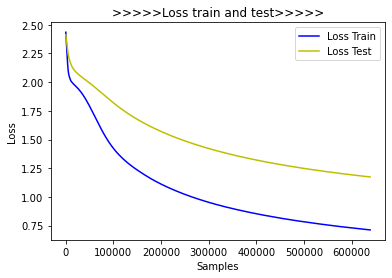

Accuracy de validación con kFold 0.686126893939394
Accuracy Train: 0.68075 
Accuracy Test: 0.68 
Diferencia entre train y test: 0.0007499999999999174

 


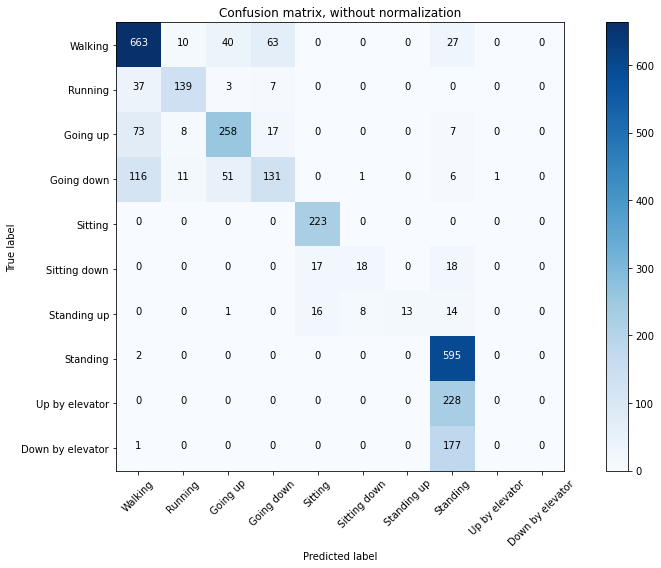

loss 0.71360 acc 0.58173: 100%|██████████| 500/500 [03:41<00:00,  2.28it/s]

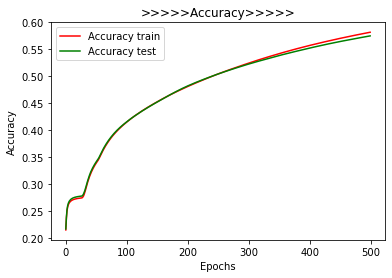

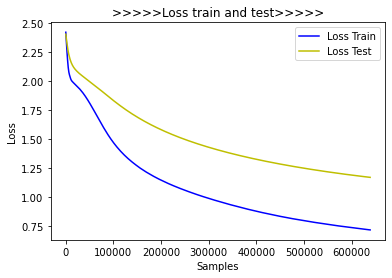

Accuracy de validación con kFold 0.6835049715909092
Accuracy Train: 0.6905 
Accuracy Test: 0.6873333333333334 
Diferencia entre train y test: 0.003166666666666651

 


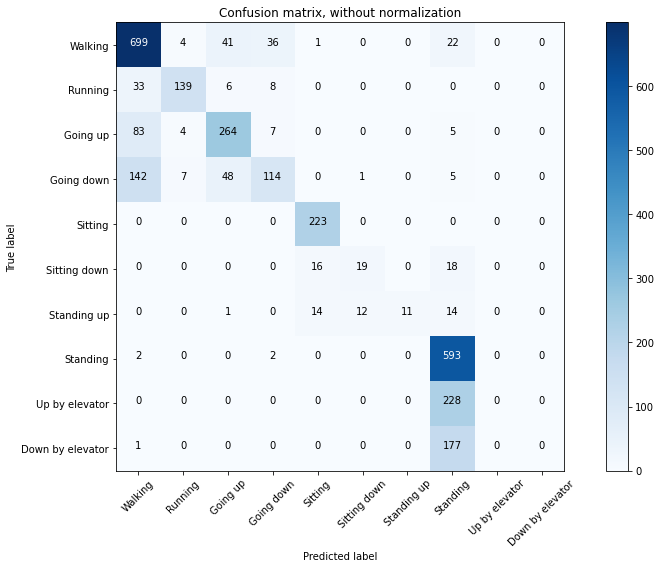

loss 0.69397 acc 0.58633: 100%|██████████| 500/500 [03:42<00:00,  2.26it/s]

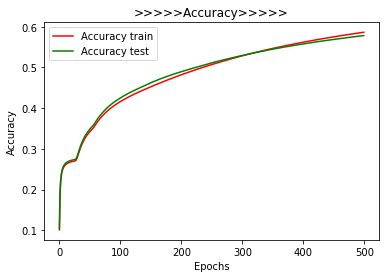

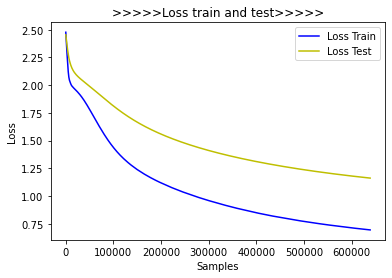

Accuracy de validación con kFold 0.6806818181818183
Accuracy Train: 0.6918333333333333 
Accuracy Test: 0.684 
Diferencia entre train y test: 0.007833333333333248

 


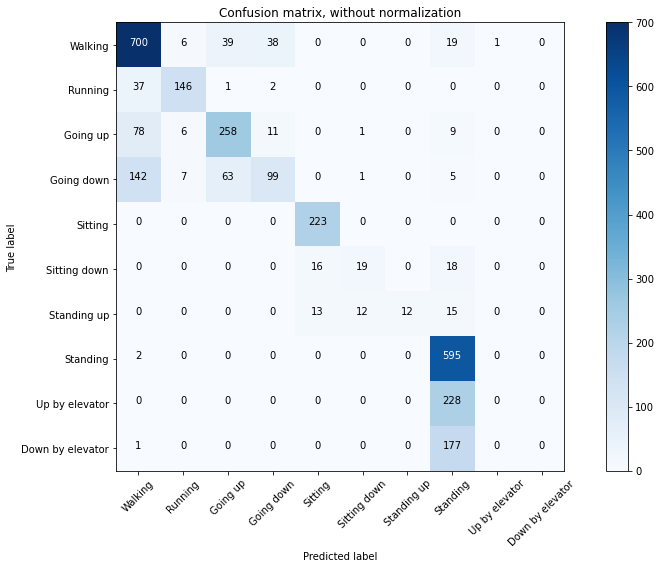

loss 0.71479 acc 0.58170: 100%|██████████| 500/500 [03:40<00:00,  2.27it/s]

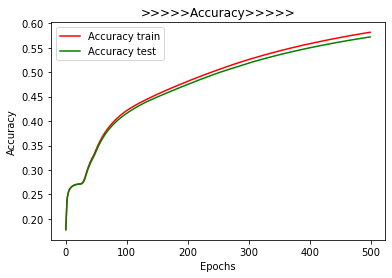

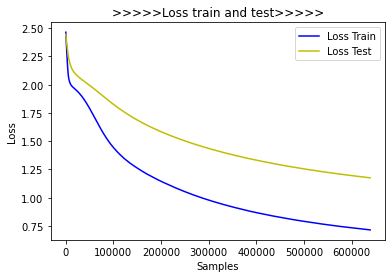

Accuracy de validación con kFold 0.6783380681818182
Accuracy Train: 0.6830833333333334 
Accuracy Test: 0.6776666666666666 
Diferencia entre train y test: 0.005416666666666736

 


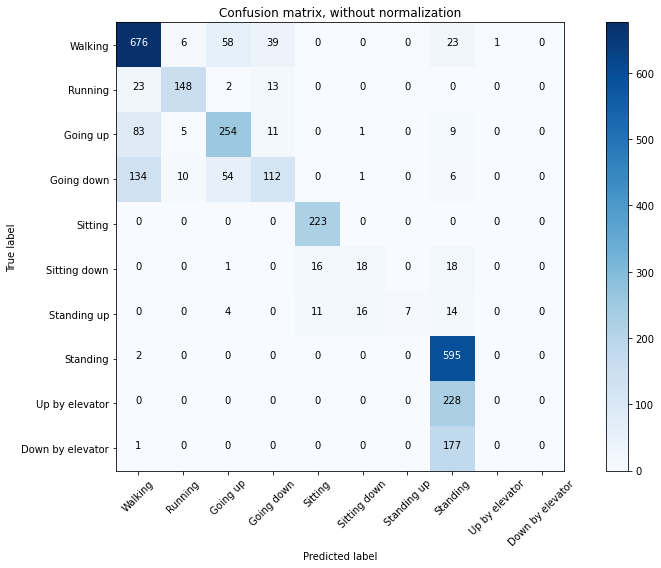

loss 0.76505 acc 0.57240: 100%|██████████| 500/500 [03:41<00:00,  2.29it/s]

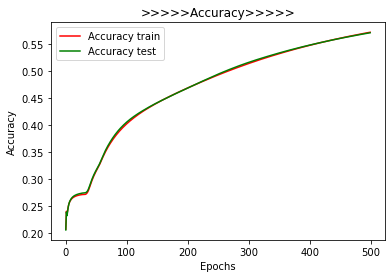

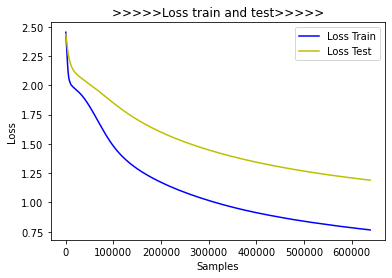

Accuracy de validación con kFold 0.6771103896103897
Accuracy Train: 0.67675 
Accuracy Test: 0.6756666666666666 
Diferencia entre train y test: 0.001083333333333325

 


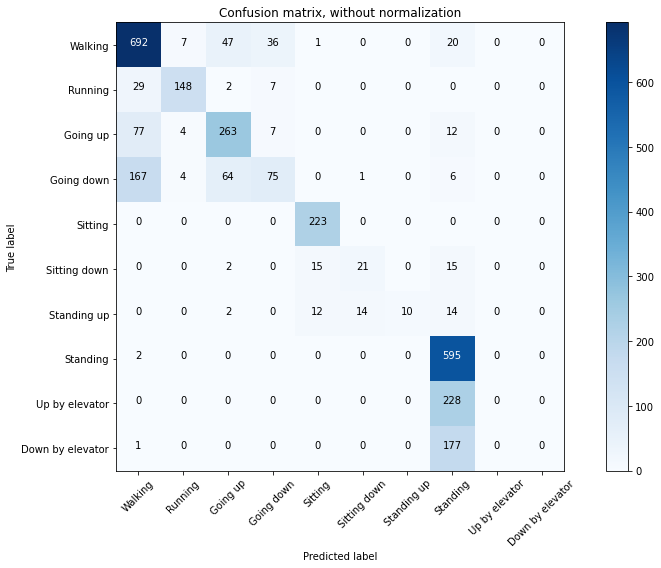

loss 0.68393 acc 0.58686: 100%|██████████| 500/500 [03:40<00:00,  2.29it/s]

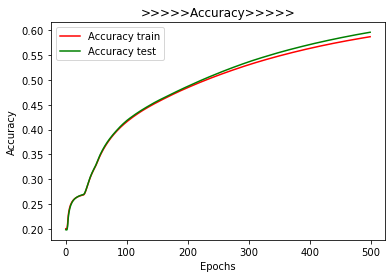

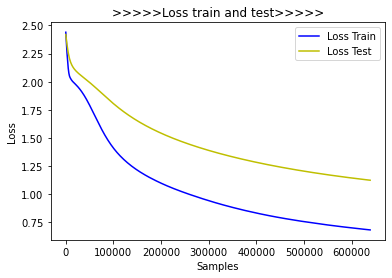

Accuracy de validación con kFold 0.6804598721590909
Accuracy Train: 0.69125 
Accuracy Test: 0.6836666666666666 
Diferencia entre train y test: 0.007583333333333386

 


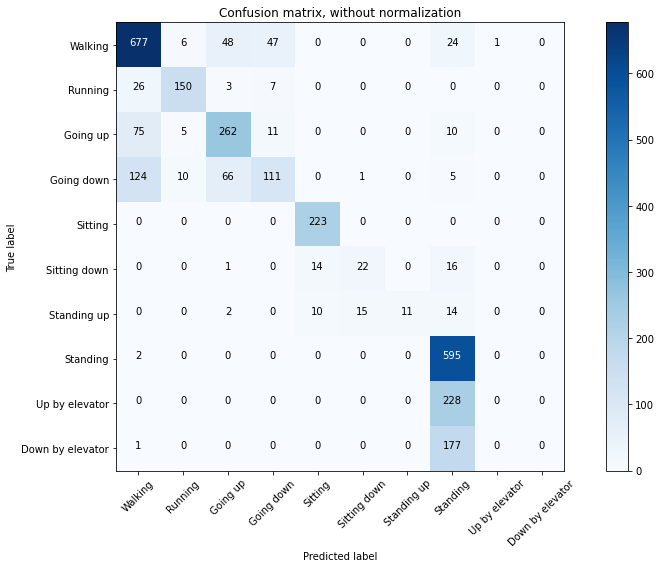

loss 0.69018 acc 0.58925: 100%|██████████| 500/500 [03:41<00:00,  2.26it/s]

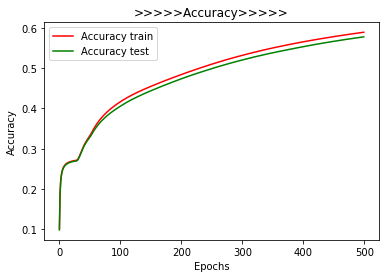

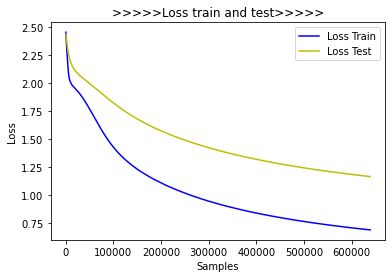

Accuracy de validación con kFold 0.680792297979798
Accuracy Train: 0.6938333333333333 
Accuracy Test: 0.684 
Diferencia entre train y test: 0.00983333333333325

 


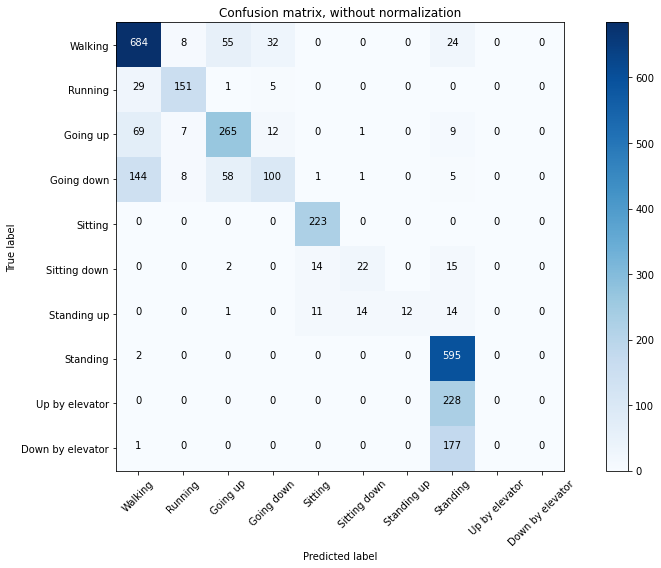

loss 0.72143 acc 0.57558: 100%|██████████| 500/500 [03:40<00:00,  2.28it/s]

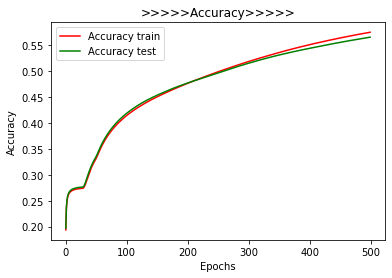

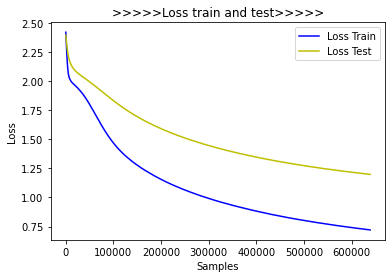

Accuracy de validación con kFold 0.6789417613636364
Accuracy Train: 0.6800833333333334 
Accuracy Test: 0.677 
Diferencia entre train y test: 0.003083333333333327

 


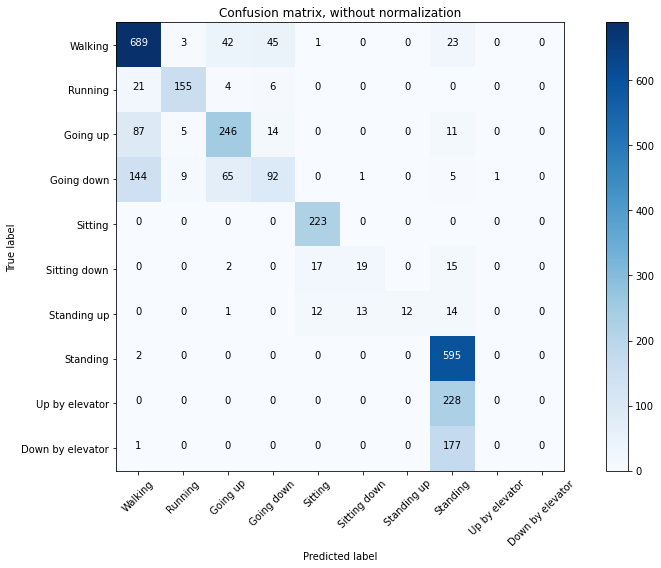

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 37m 30.4375s
============ Launch with 15000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 200 Hidden neurons ============


loss 0.57352 acc 0.63229: 100%|██████████| 500/500 [03:41<00:00,  2.27it/s]

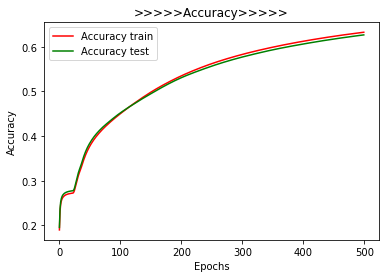

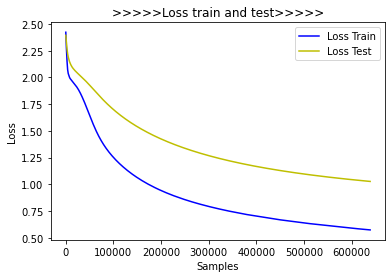

Accuracy de validación con kFold 0.7110795454545455
Accuracy Train: 0.7175833333333334 
Accuracy Test: 0.7143333333333334 
Diferencia entre train y test: 0.003249999999999975

 


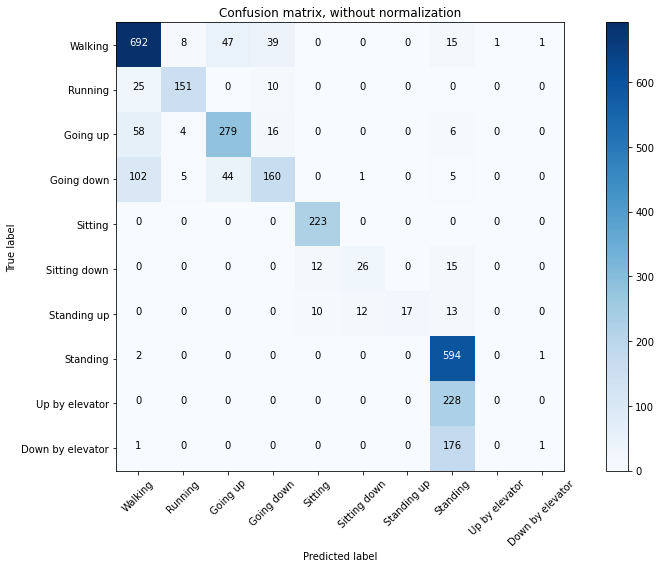

loss 0.58609 acc 0.62823: 100%|██████████| 500/500 [03:41<00:00,  2.29it/s]

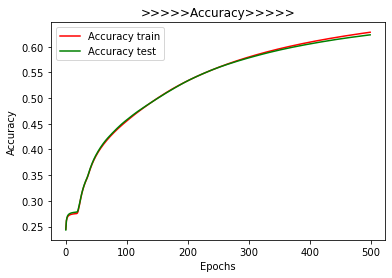

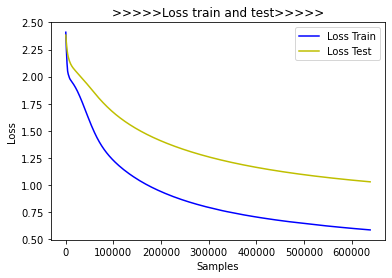

Accuracy de validación con kFold 0.703125
Accuracy Train: 0.7106666666666667 
Accuracy Test: 0.709 
Diferencia entre train y test: 0.0016666666666667052

 


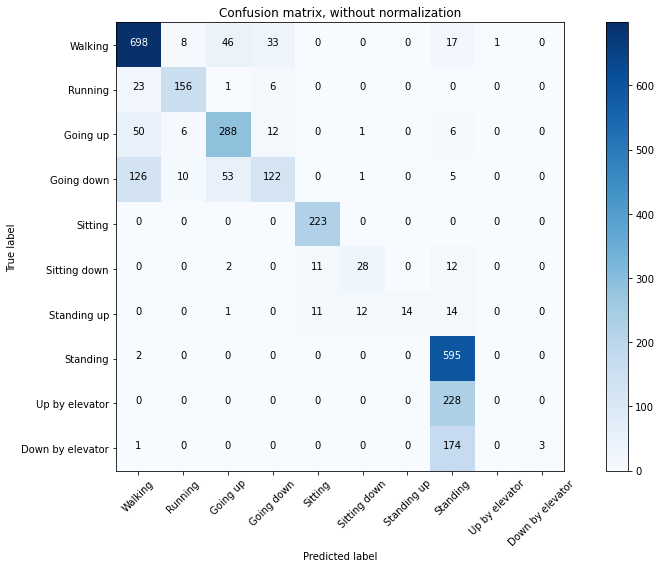

loss 0.58174 acc 0.62408: 100%|██████████| 500/500 [03:42<00:00,  2.29it/s]

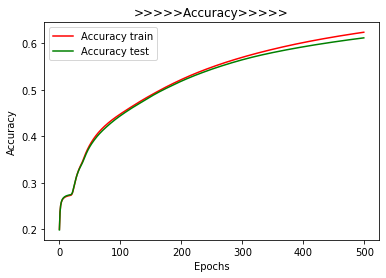

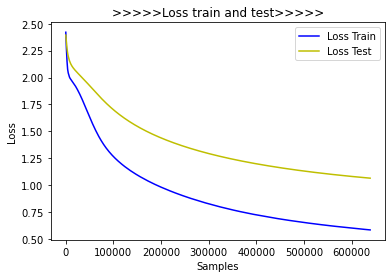

Accuracy de validación con kFold 0.7003077651515152
Accuracy Train: 0.7174166666666667 
Accuracy Test: 0.7073333333333334 
Diferencia entre train y test: 0.010083333333333333

 


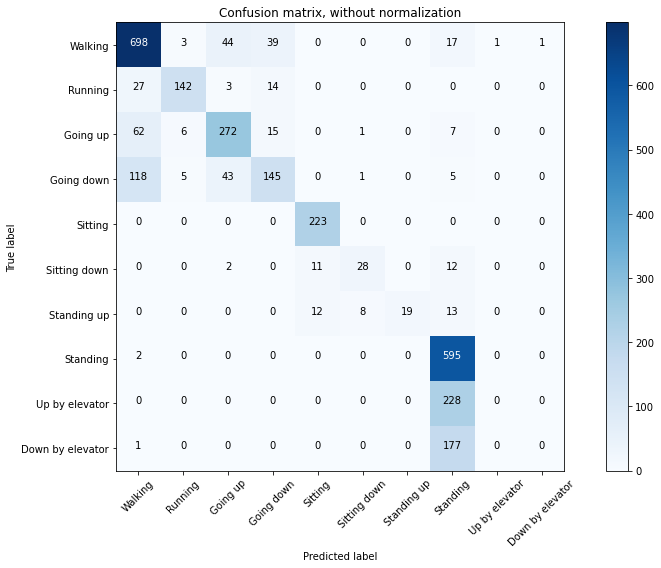

loss 0.57190 acc 0.62163: 100%|██████████| 500/500 [03:42<00:00,  2.28it/s]

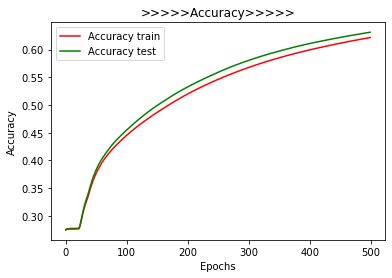

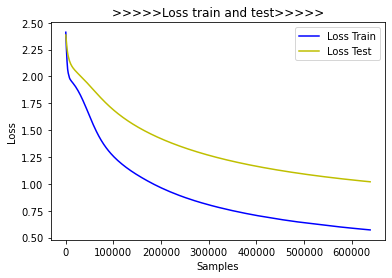

Accuracy de validación con kFold 0.7048117897727273
Accuracy Train: 0.719 
Accuracy Test: 0.7183333333333334 
Diferencia entre train y test: 0.0006666666666665932

 


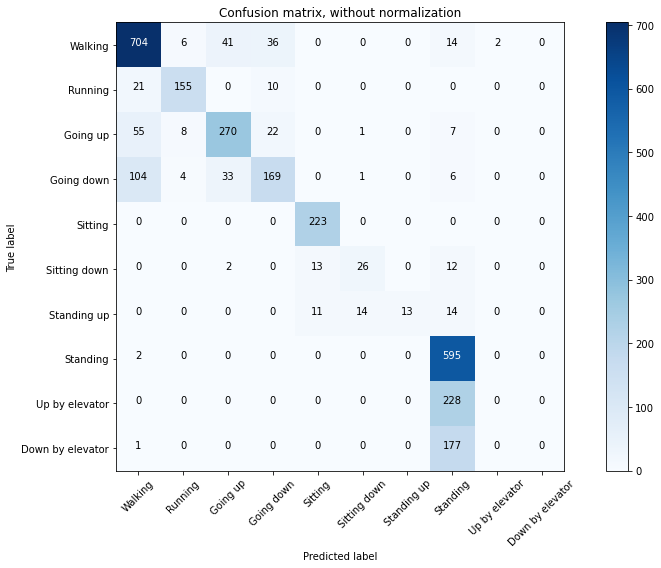

loss 0.60614 acc 0.62467: 100%|██████████| 500/500 [03:46<00:00,  2.22it/s]

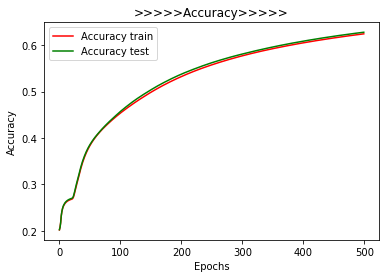

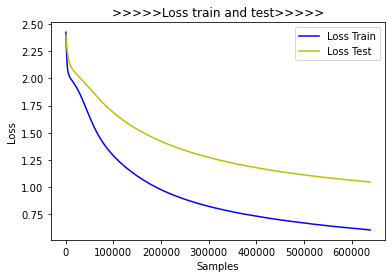

Accuracy de validación con kFold 0.7058380681818182
Accuracy Train: 0.7095 
Accuracy Test: 0.7083333333333334 
Diferencia entre train y test: 0.0011666666666666492

 


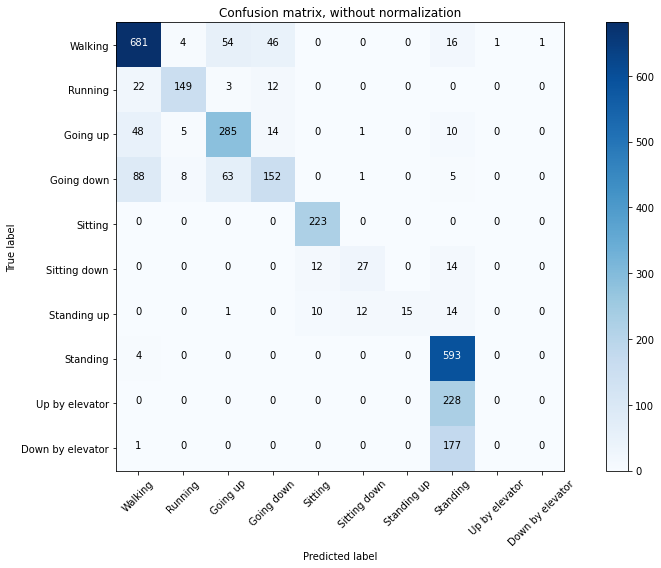

loss 0.59283 acc 0.63056: 100%|██████████| 500/500 [03:46<00:00,  2.23it/s]

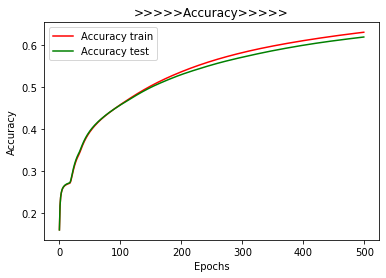

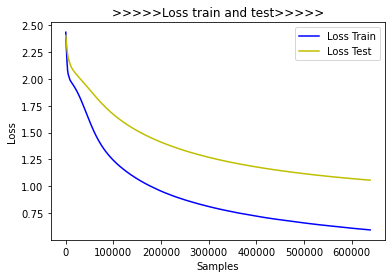

Accuracy de validación con kFold 0.7054214015151515
Accuracy Train: 0.7171666666666666 
Accuracy Test: 0.7066666666666667 
Diferencia entre train y test: 0.010499999999999954

 


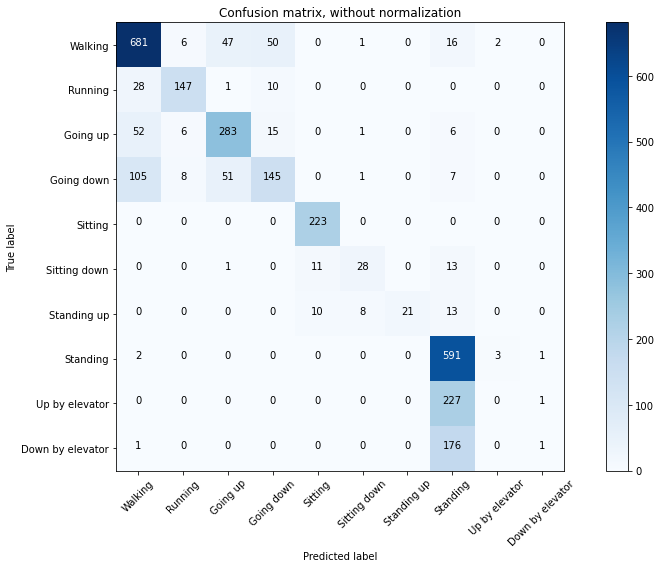

loss 0.59592 acc 0.62211: 100%|██████████| 500/500 [03:45<00:00,  2.25it/s]

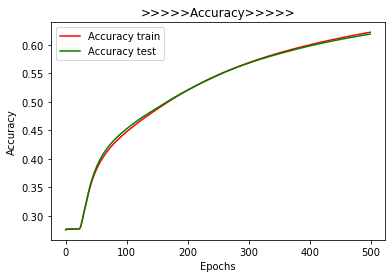

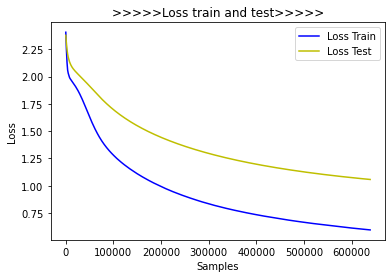

Accuracy de validación con kFold 0.7053368506493507
Accuracy Train: 0.7186666666666667 
Accuracy Test: 0.7043333333333334 
Diferencia entre train y test: 0.014333333333333309

 


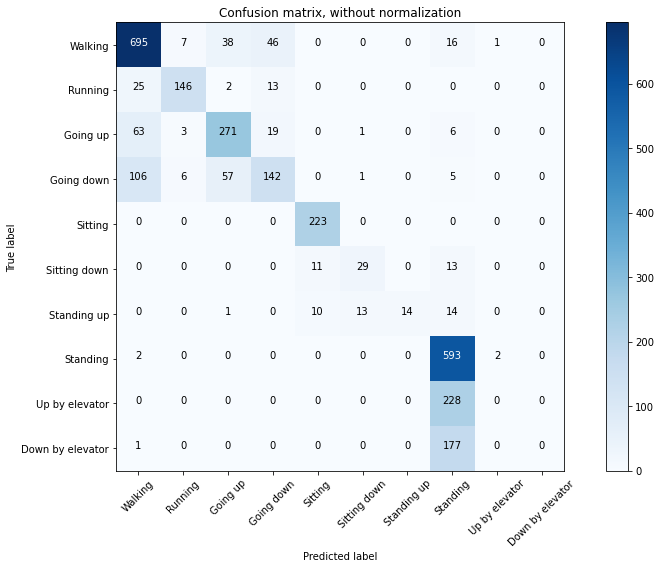

loss 0.61036 acc 0.61409: 100%|██████████| 500/500 [03:45<00:00,  2.24it/s]

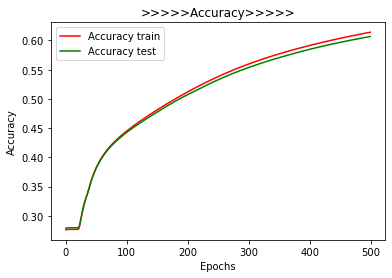

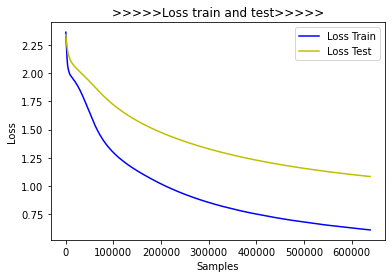

Accuracy de validación con kFold 0.7046697443181819
Accuracy Train: 0.71175 
Accuracy Test: 0.706 
Diferencia entre train y test: 0.005750000000000033

 


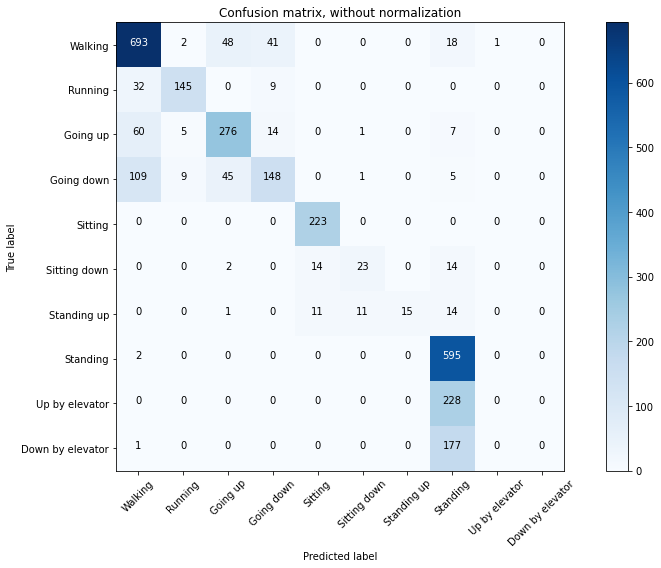

loss 0.61069 acc 0.61878: 100%|██████████| 500/500 [03:44<00:00,  2.27it/s]

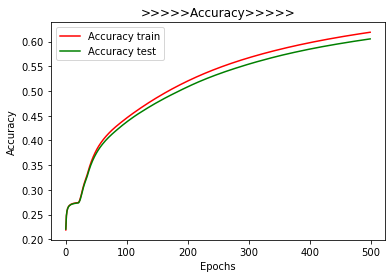

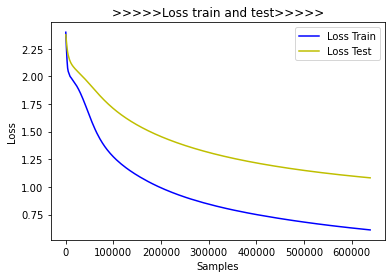

Accuracy de validación con kFold 0.7037247474747476
Accuracy Train: 0.7090833333333333 
Accuracy Test: 0.7036666666666667 
Diferencia entre train y test: 0.005416666666666625

 


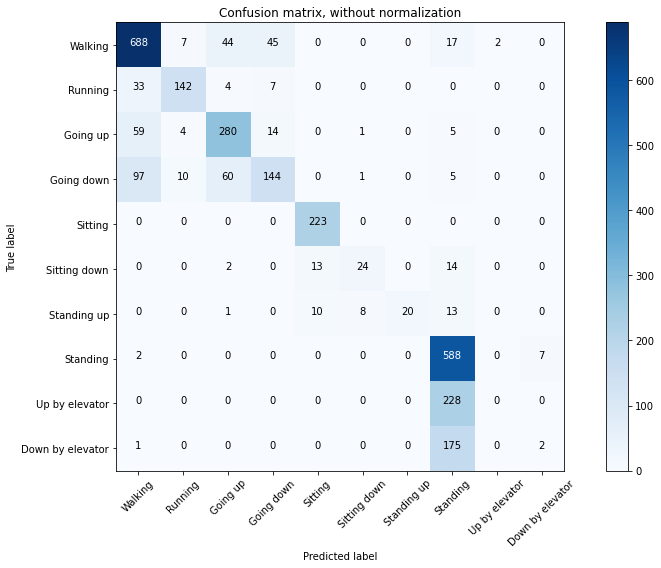

loss 0.62385 acc 0.61527: 100%|██████████| 500/500 [03:44<00:00,  2.24it/s]

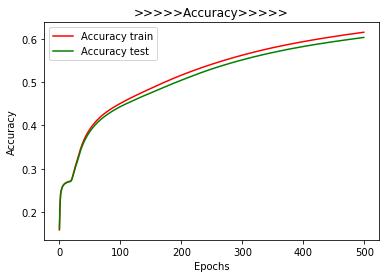

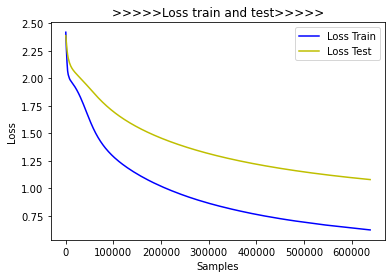

Accuracy de validación con kFold 0.7029545454545455
Accuracy Train: 0.7095833333333333 
Accuracy Test: 0.702 
Diferencia entre train y test: 0.007583333333333386

 


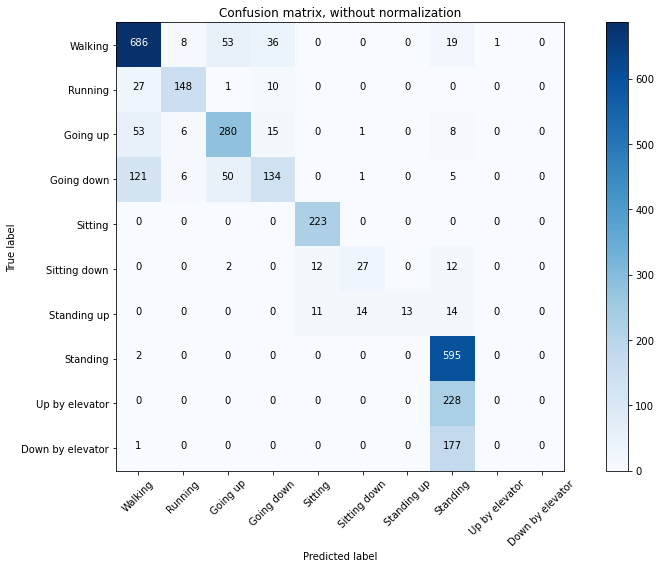

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 37m 57.765625s
============ Launch with 15000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 300 Hidden neurons ============


loss 0.51849 acc 0.64948: 100%|██████████| 500/500 [03:47<00:00,  2.24it/s]

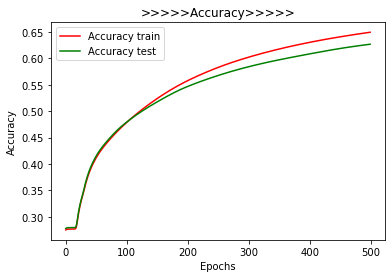

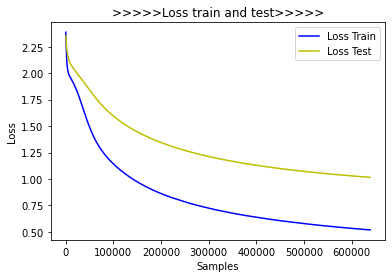

Accuracy de validación con kFold 0.7026278409090909
Accuracy Train: 0.7306666666666667 
Accuracy Test: 0.719 
Diferencia entre train y test: 0.011666666666666714

 


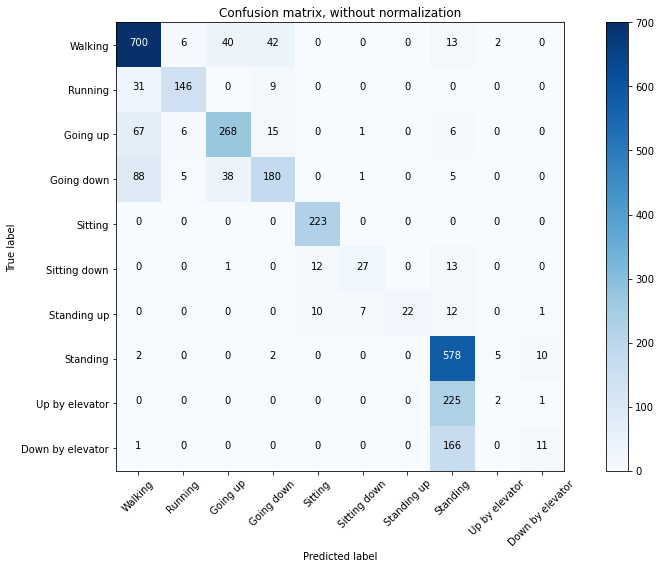

loss 0.52505 acc 0.64292: 100%|██████████| 500/500 [03:46<00:00,  2.23it/s]

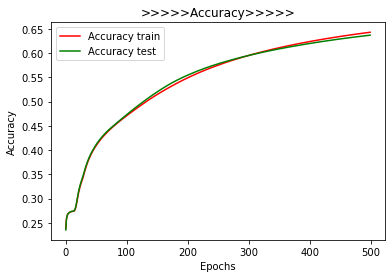

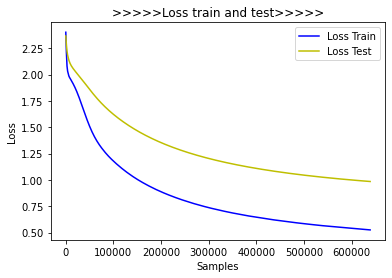

Accuracy de validación con kFold 0.7078480113636364
Accuracy Train: 0.7230833333333333 
Accuracy Test: 0.72 
Diferencia entre train y test: 0.003083333333333327

 


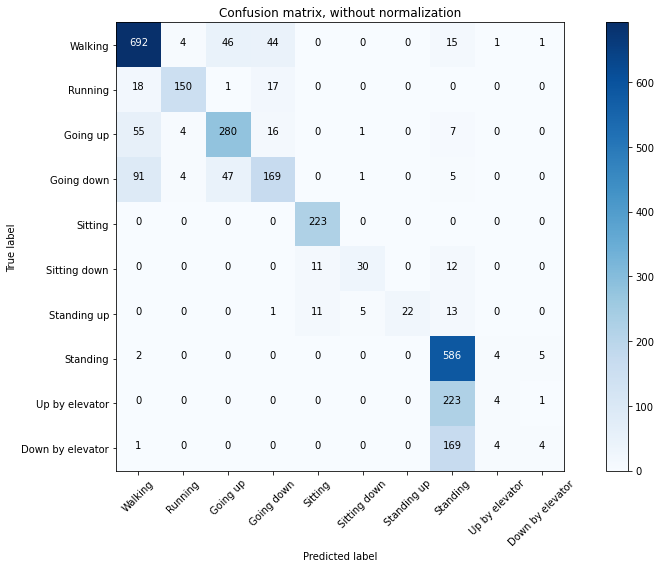

loss 0.49485 acc 0.65655: 100%|██████████| 500/500 [03:47<00:00,  2.24it/s]

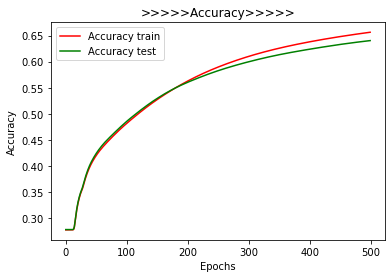

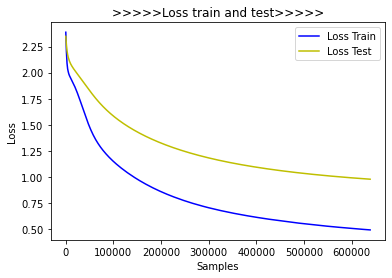

Accuracy de validación con kFold 0.7079545454545455
Accuracy Train: 0.7315833333333334 
Accuracy Test: 0.7203333333333334 
Diferencia entre train y test: 0.011249999999999982

 


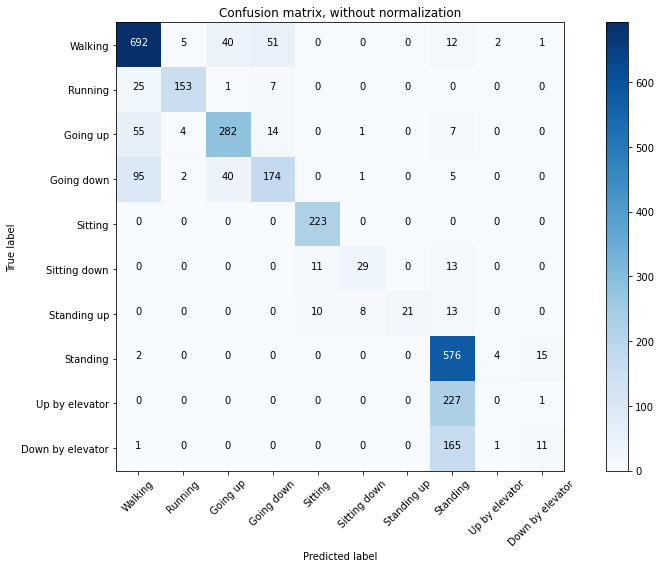

loss 0.53204 acc 0.64766: 100%|██████████| 500/500 [03:45<00:00,  2.28it/s]

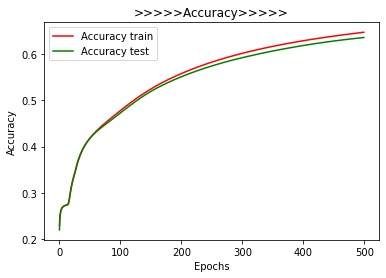

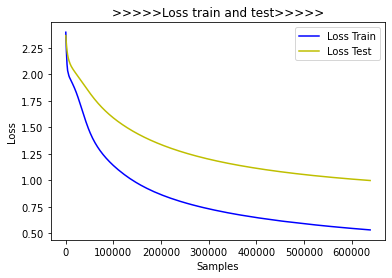

Accuracy de validación con kFold 0.7077237215909091
Accuracy Train: 0.7241666666666666 
Accuracy Test: 0.7153333333333334 
Diferencia entre train y test: 0.008833333333333249

 


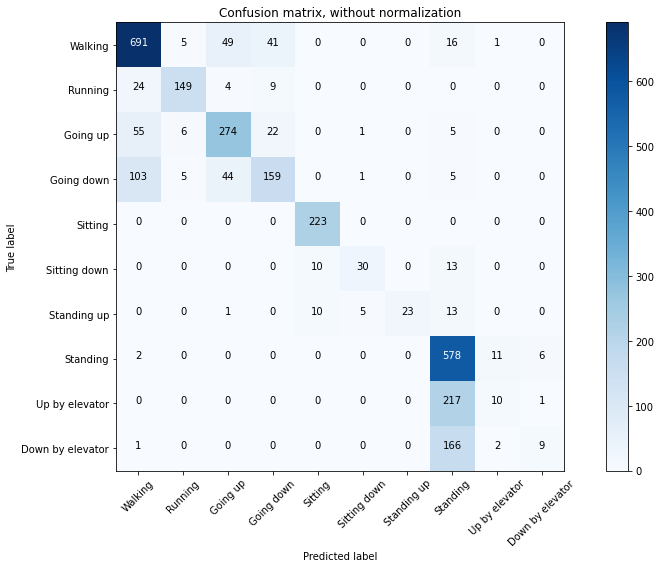

loss 0.52037 acc 0.64328: 100%|██████████| 500/500 [03:43<00:00,  2.25it/s]

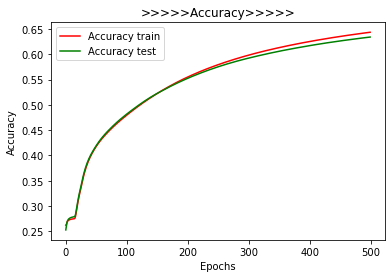

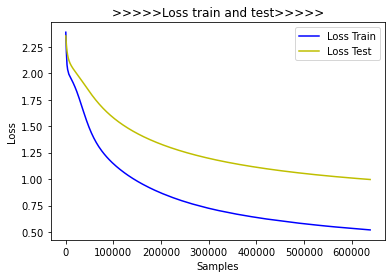

Accuracy de validación con kFold 0.7066193181818182
Accuracy Train: 0.7186666666666667 
Accuracy Test: 0.7116666666666667 
Diferencia entre train y test: 0.007000000000000006

 


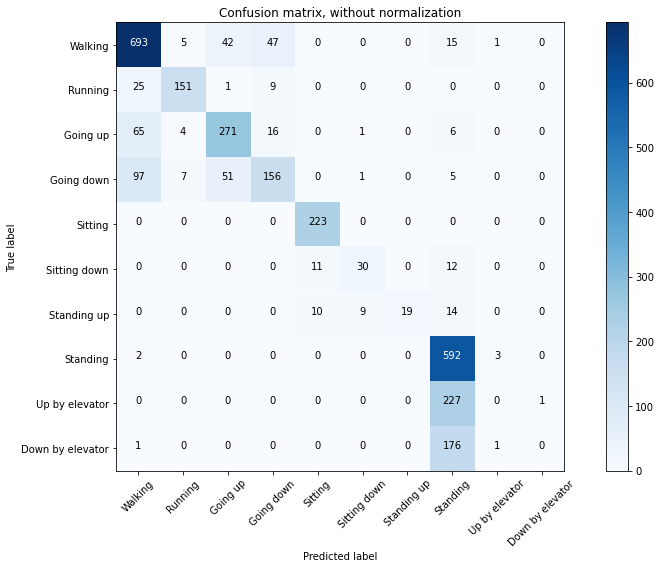

loss 0.52589 acc 0.64587: 100%|██████████| 500/500 [03:43<00:00,  2.28it/s]

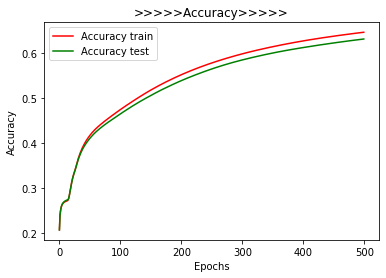

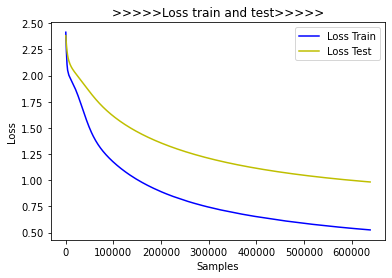

Accuracy de validación con kFold 0.7073982007575758
Accuracy Train: 0.7283333333333334 
Accuracy Test: 0.7186666666666667 
Diferencia entre train y test: 0.009666666666666712

 


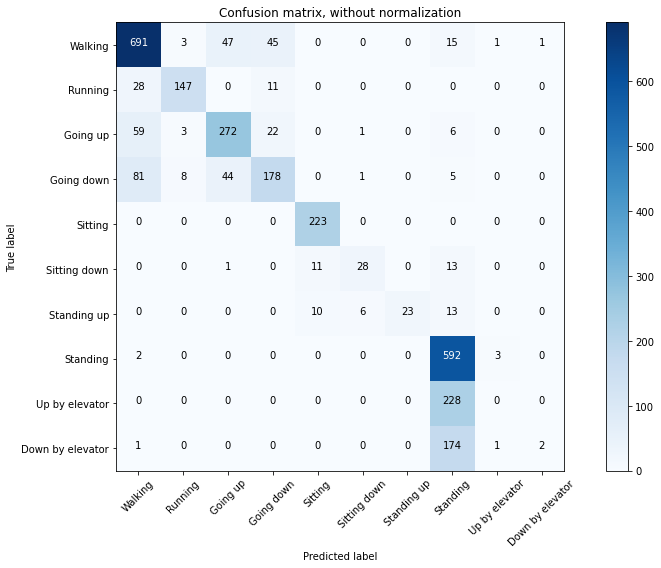

loss 0.53227 acc 0.64605: 100%|██████████| 500/500 [03:44<00:00,  2.25it/s]

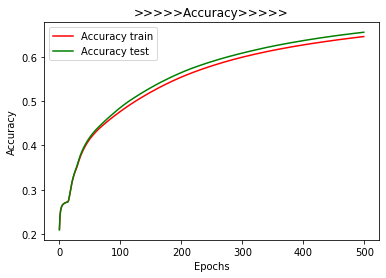

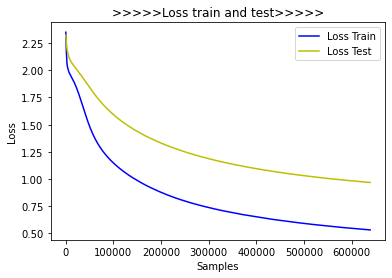

Accuracy de validación con kFold 0.7113534902597403
Accuracy Train: 0.7278333333333333 
Accuracy Test: 0.7263333333333334 
Diferencia entre train y test: 0.0014999999999999458

 


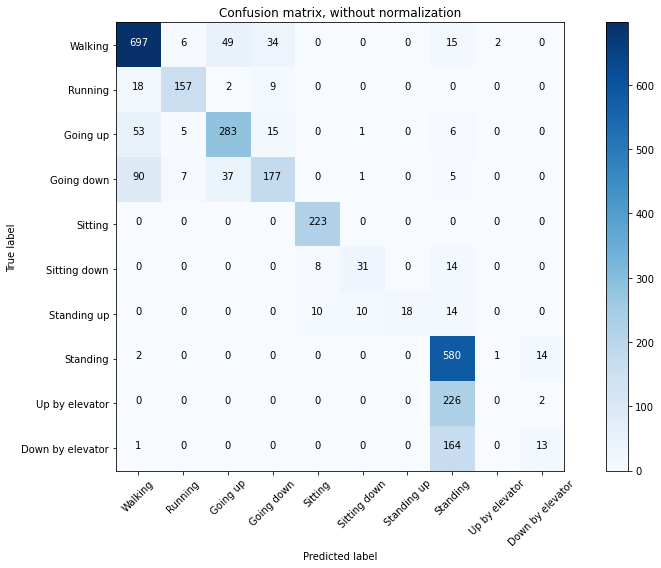

loss 0.50698 acc 0.65403: 100%|██████████| 500/500 [03:44<00:00,  2.25it/s]

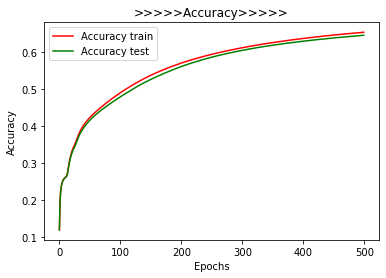

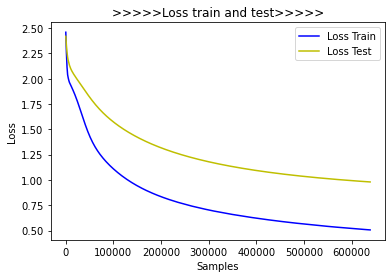

Accuracy de validación con kFold 0.7118252840909092
Accuracy Train: 0.7240833333333333 
Accuracy Test: 0.717 
Diferencia entre train y test: 0.00708333333333333

 


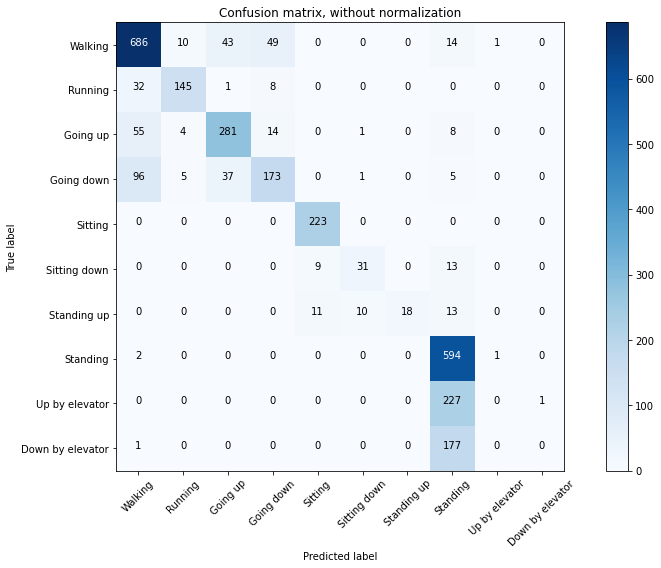

loss 0.52913 acc 0.64939: 100%|██████████| 500/500 [03:43<00:00,  2.24it/s]

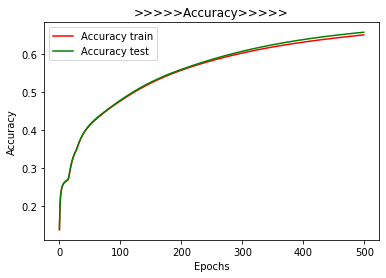

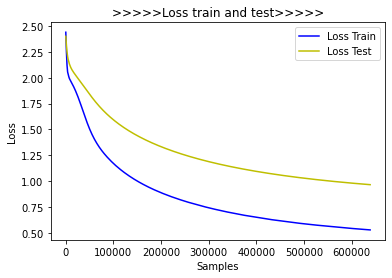

Accuracy de validación con kFold 0.7142597853535354
Accuracy Train: 0.7323333333333333 
Accuracy Test: 0.721 
Diferencia entre train y test: 0.011333333333333306

 


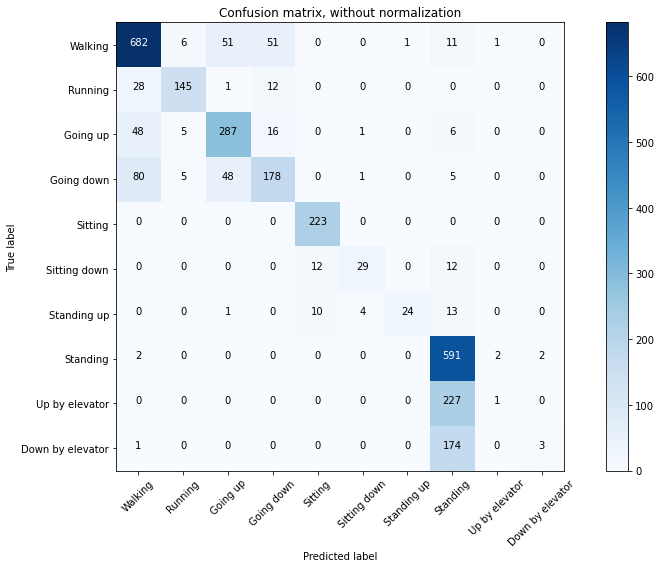

loss 0.52290 acc 0.65261: 100%|██████████| 500/500 [03:43<00:00,  2.22it/s]

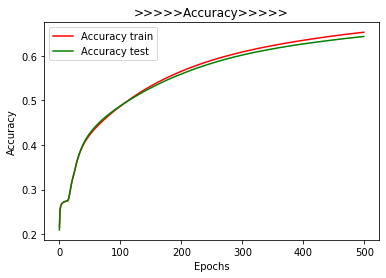

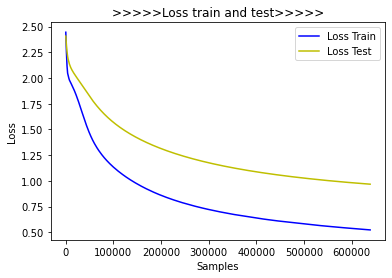

Accuracy de validación con kFold 0.7139062500000001
Accuracy Train: 0.7283333333333334 
Accuracy Test: 0.7223333333333334 
Diferencia entre train y test: 0.006000000000000005

 


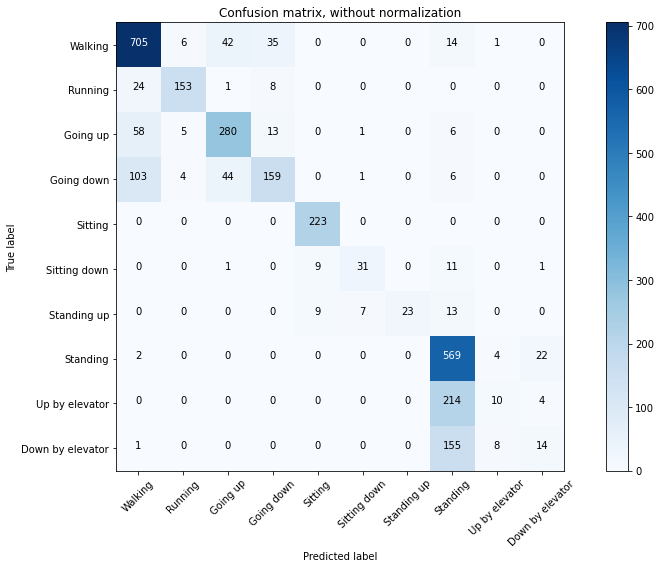

  0%|          | 0/500 [00:00<?, ?it/s]

Time: 38m 1.40625s
============ Launch with 15000 Samples, 500 Epochs, 256 Batch, 10 Splits, 0.001 lr, 400 Hidden neurons ============


loss 0.47698 acc 0.66660: 100%|██████████| 500/500 [03:43<00:00,  2.25it/s]

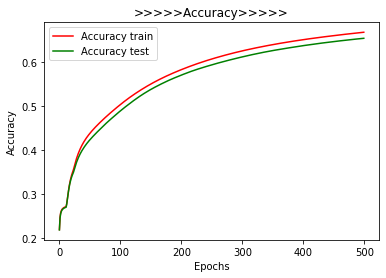

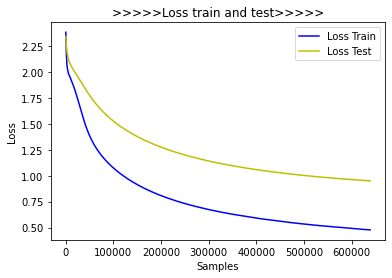

Accuracy de validación con kFold 0.7213068181818182
Accuracy Train: 0.7383333333333333 
Accuracy Test: 0.7276666666666667 
Diferencia entre train y test: 0.010666666666666602

 


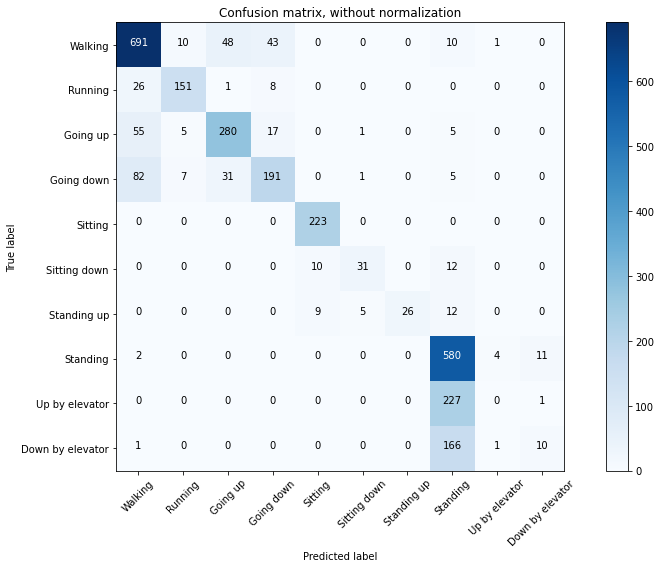

loss 0.47667 acc 0.66521: 100%|██████████| 500/500 [03:44<00:00,  2.25it/s]

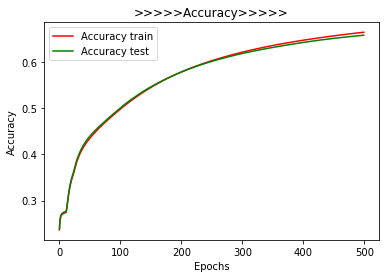

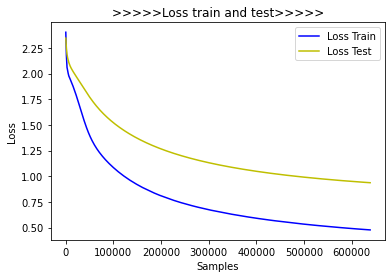

Accuracy de validación con kFold 0.7229758522727272
Accuracy Train: 0.7366666666666667 
Accuracy Test: 0.7263333333333334 
Diferencia entre train y test: 0.010333333333333306

 


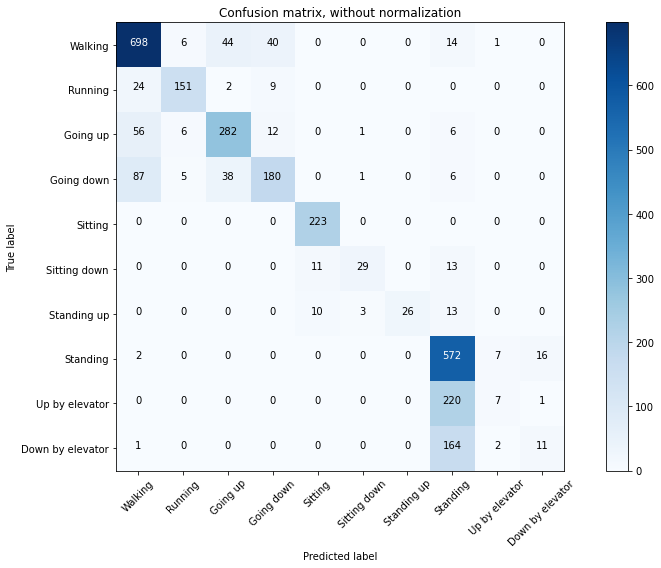

loss 0.48453 acc 0.66390: 100%|██████████| 500/500 [03:43<00:00,  2.26it/s]

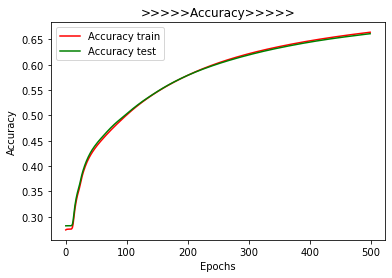

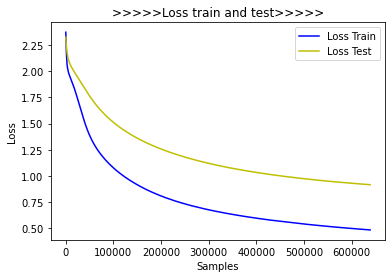

Accuracy de validación con kFold 0.7249763257575758
Accuracy Train: 0.7353333333333333 
Accuracy Test: 0.725 
Diferencia entre train y test: 0.010333333333333306

 


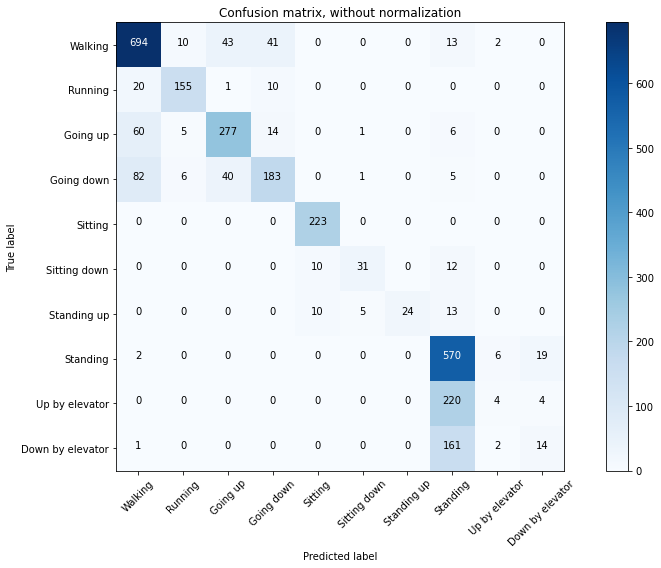

loss 0.48796 acc 0.65596: 100%|██████████| 500/500 [03:43<00:00,  2.25it/s]

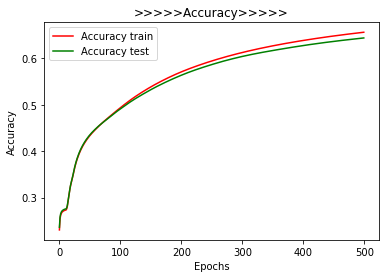

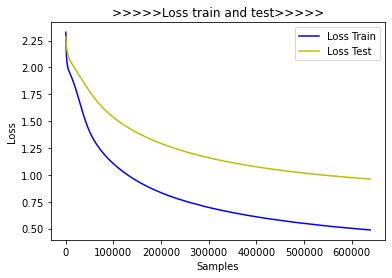

Accuracy de validación con kFold 0.7217329545454545
Accuracy Train: 0.7316666666666667 
Accuracy Test: 0.717 
Diferencia entre train y test: 0.014666666666666717

 


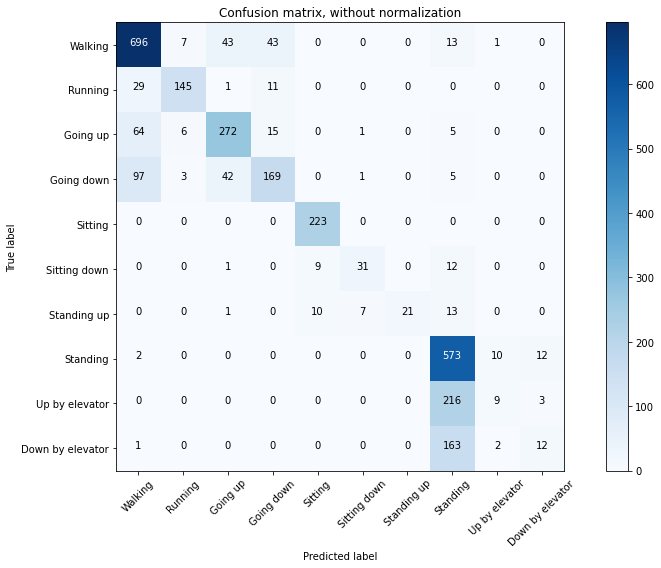

loss 0.47063 acc 0.66076: 100%|██████████| 500/500 [03:43<00:00,  2.23it/s]

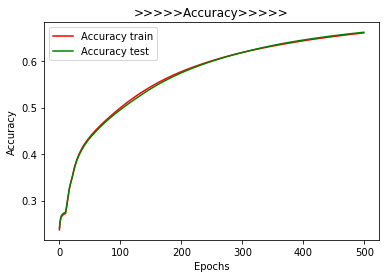

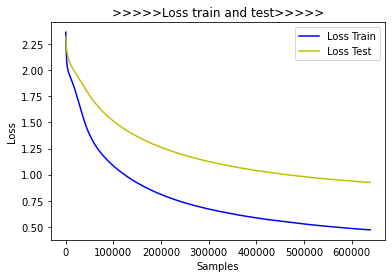

Accuracy de validación con kFold 0.723465909090909
Accuracy Train: 0.7344166666666667 
Accuracy Test: 0.7253333333333334 
Diferencia entre train y test: 0.009083333333333332

 


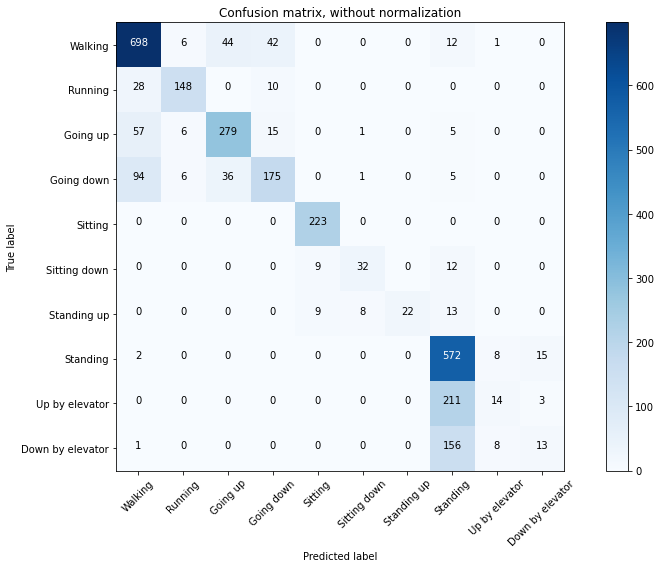

loss 0.47590 acc 0.66393: 100%|██████████| 500/500 [03:44<00:00,  2.25it/s]

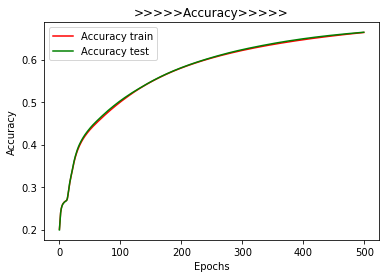

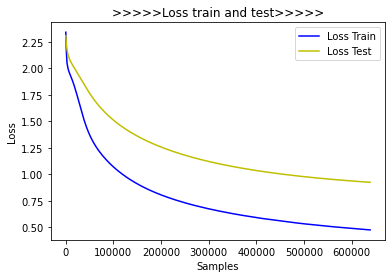

Accuracy de validación con kFold 0.7240411931818181
Accuracy Train: 0.7370833333333333 
Accuracy Test: 0.7253333333333334 
Diferencia entre train y test: 0.011749999999999927

 


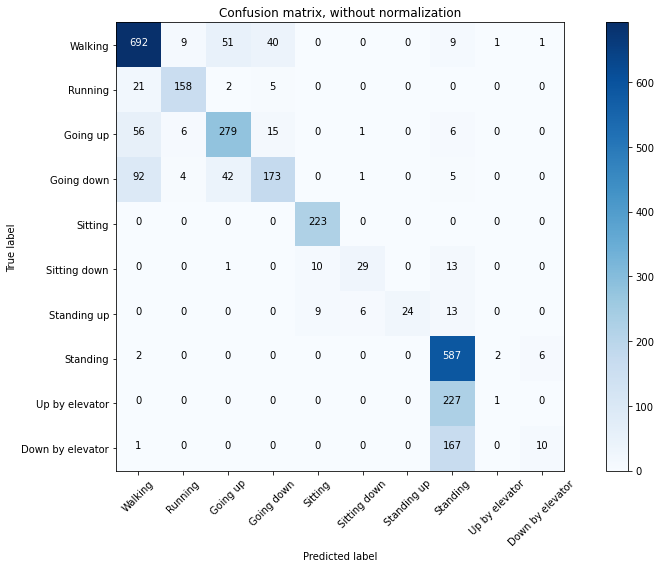

loss 0.48603 acc 0.66502: 100%|██████████| 500/500 [03:43<00:00,  2.26it/s]

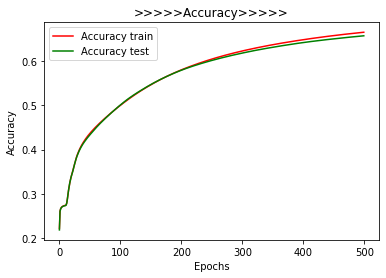

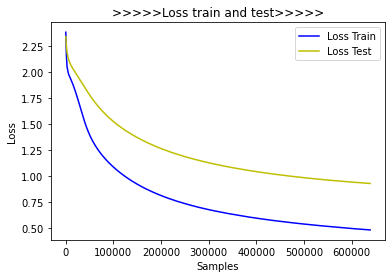

Accuracy de validación con kFold 0.7238027597402598
Accuracy Train: 0.7355833333333334 
Accuracy Test: 0.7323333333333333 
Diferencia entre train y test: 0.003250000000000086

 


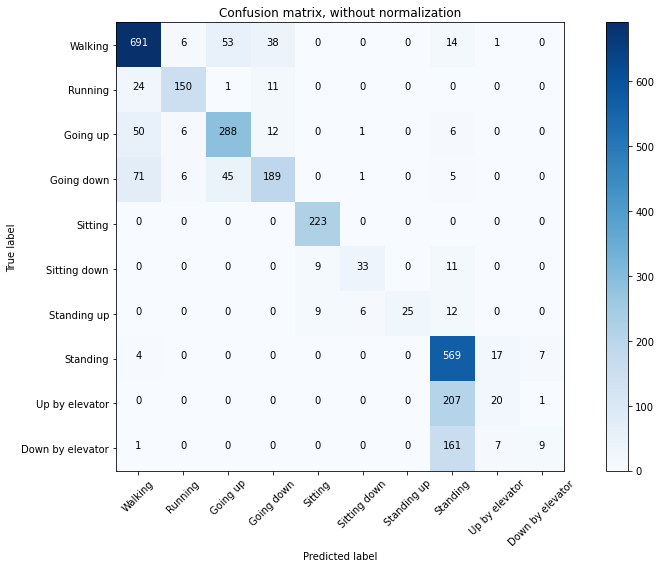

loss 0.48597 acc 0.65965: 100%|██████████| 500/500 [03:43<00:00,  2.27it/s]

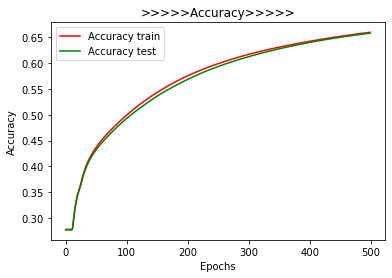

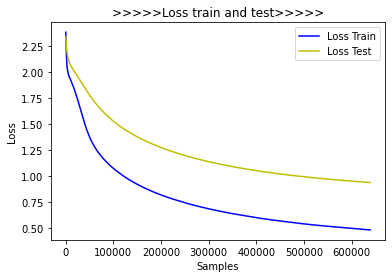

Accuracy de validación con kFold 0.7246182528409091
Accuracy Train: 0.73575 
Accuracy Test: 0.7253333333333334 
Diferencia entre train y test: 0.01041666666666663

 


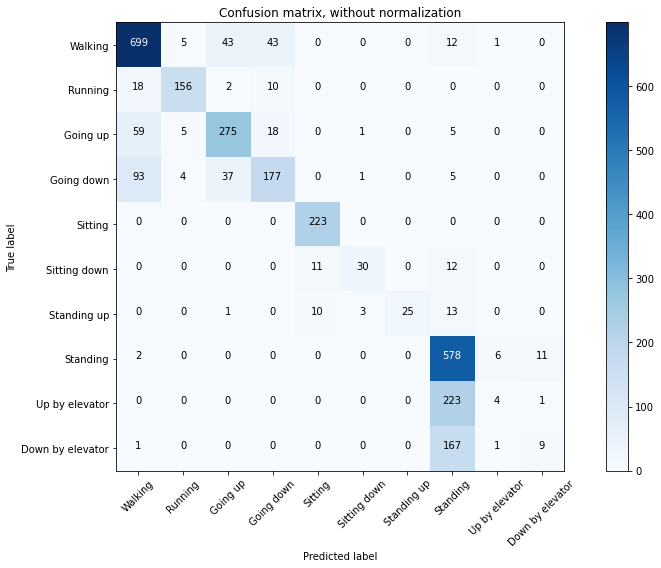

loss 0.48351 acc 0.66326: 100%|██████████| 500/500 [03:43<00:00,  2.26it/s]

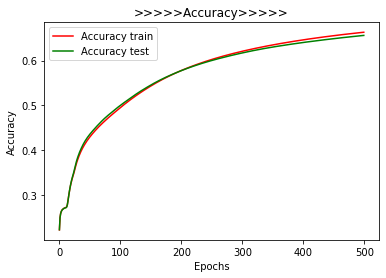

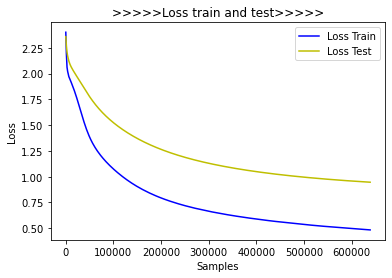

Accuracy de validación con kFold 0.7244239267676768
Accuracy Train: 0.7349166666666667 
Accuracy Test: 0.7253333333333334 
Diferencia entre train y test: 0.009583333333333277

 


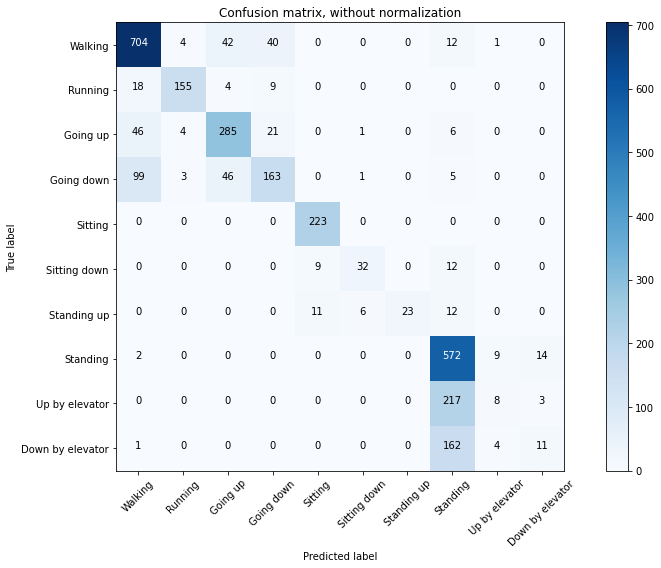

loss 0.46639 acc 0.66564: 100%|██████████| 500/500 [03:43<00:00,  2.26it/s]

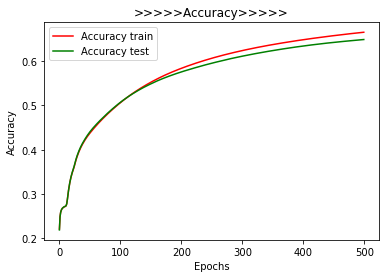

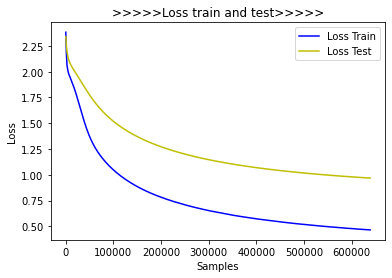

Accuracy de validación con kFold 0.7232244318181819
Accuracy Train: 0.73575 
Accuracy Test: 0.7286666666666667 
Diferencia entre train y test: 0.00708333333333333

 


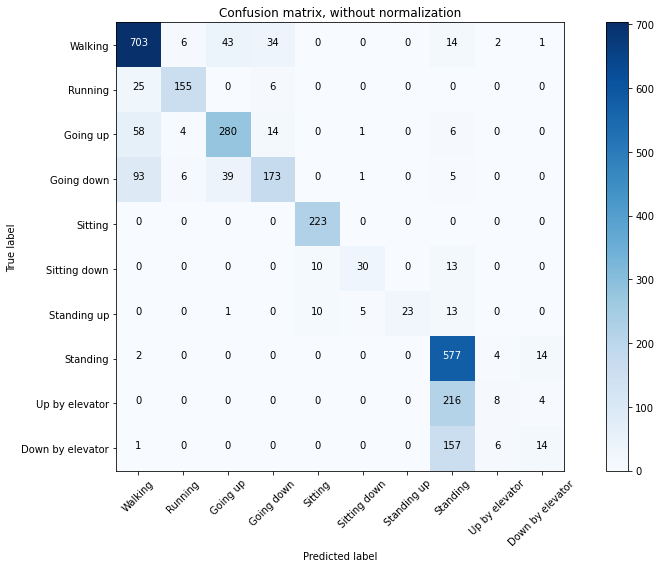

Time: 37m 49.625s


In [17]:
list_times, list_neuron, list_acc_test = [], [], []
for hidden_size in range(100, 500, 100):
    print(f'\033[1;36m============ Launch with {nSamples} Samples, {num_epochs} Epochs, {batch_size} Batch, {num_splits} Splits, {learning_rate} lr, {hidden_size} Hidden neurons ============\033[0;m')
    #  Llamo al metodo que implementa el K-fold
    time_mean, modelo_trained, loss_test_list, acc_test = Modulo_MLP.CV_Kfold(device, num_classes, input_size, X_train, 
                                                                   y_train,hidden_size,num_splits,batch_size,num_epochs,
                                                                   learning_rate, (X_test, y_test), modelo_pre_train)
    list_times.append(time_mean)
    list_neuron.append(hidden_size)
    list_acc_test.append(acc_test)
# list_times = [z * int(1e9) for z in list_times]

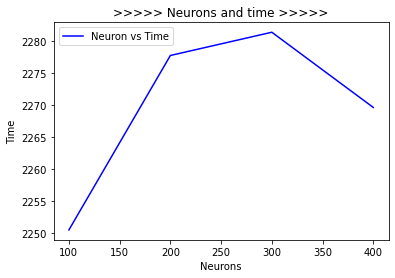

In [18]:
print(list_times)
plt.plot(list_neuron,list_times,"b")
plt.legend(['Neuron vs Time'])
plt.xlabel('Neurons')
plt.ylabel('Time')
plt.title('>>>>> Neurons and time >>>>>')
plt.show()

In [24]:
print(list_times)

[2250.4375, 2277.765625, 2281.40625, 2269.625]


[0.6817666666666667, 0.708, 0.7191666666666666, 0.7258333333333333]


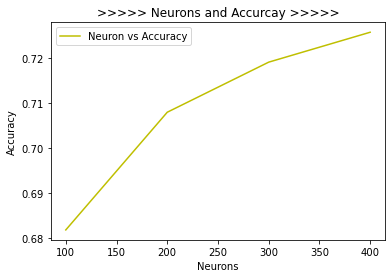

In [19]:
print(list_acc_test)
plt.plot(list_neuron, list_acc_test, "y")
plt.legend(['Neuron vs Accuracy'])
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('>>>>> Neurons and Accurcay >>>>>')
plt.show()


In [21]:
# Calacular el accuracy de test con un conjunto nunca antes visto 
d = data[800000:900000]

# d = d[(d.act == 1) | (d.act == 2) | (d.act == 3) | (d.act == 4) | (d.act == 5) | (d.act == 6) | (d.act == 7) 
#         | (d.act == 8) | (d.act == 9) | (d.act == 12)]

X_t = d.drop(['act'], axis = 'columns')
y_t = d.act

Xt_tensor = torch.tensor(X_t.values).cuda()

yt_tensor = torch.tensor(y_t.values).cuda()

testset = torch.utils.data.TensorDataset(Xt_tensor,  yt_tensor)
test_loader = torch.utils.data.DataLoader(testset, batch_size = batch_size, shuffle=False)

accuracy_test = Modulo_MLP.evaluate(modelo_trained.to(device),test_loader)
print(f'Accuracy de test {accuracy_test}')


# #Guardo el modelo con el accuracy de tes
# # Scripting load
# acc_label = evaluate_aux(modelo_trained.to(device), test_loader)
# scripted_model_final = torch.jit.script(modelo_trained.cpu())
# # Scripting save
# from datetime import datetime
# now = datetime.now()
# scripted_model_final.save('modelo_final_'+str(now.date())+'_'+str(round(acc_label, 4))+'_Test'+'.zip')

Accuracy de test 0.7290341272378517


In [22]:
#Libera toda la memoria caché no utilizada de PyTorch
torch.cuda.empty_cache()